In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt

import numpy as np

In [3]:
import surp
import arya

/astro/dboyea/.local/lib/python3.11/site-packages/vice/__init__.py:141: UserWarning: Using un-released version of VICE
  warnings.warn("Using un-released version of VICE", UserWarning)


In [4]:
from scipy.integrate import quad

# loading model

In [31]:
model_name = "conroy22"

In [32]:
fiducial = surp.ViceModel.from_file(f"../../models/fiducial/{model_name}/model.json")

In [33]:
params = surp.simulation.parameters.MWParams.from_file(f"../../models/fiducial/{model_name}/params.toml")

In [34]:
model  = surp.simulation.create_model(params)

/astro/dboyea/.local/lib/python3.11/site-packages/vice/core/singlezone/singlezone.py:842: ScienceWarning: Closed-box GCE models have been shown to overpredict the metallicities of solar neighborhood stars. This was known as the G-dwarf problem (Tinsley 1980, Fundamentals of Cosmic Phys., 5, 287). Outflows have been shown to be necessary for maintaining long-term chemical equilibrium (Dalcanton 2007, ApJ, 658, 941).
  self.__c_version.eta = value


In [35]:
R_MAX = 15.5
h = fiducial.history[fiducial.history.R < R_MAX]

In [36]:
t_end = np.max(h.time)

In [37]:
filt = h.time == t_end
h_end = h[filt]

# Star Formation History
Should go as the two part power law

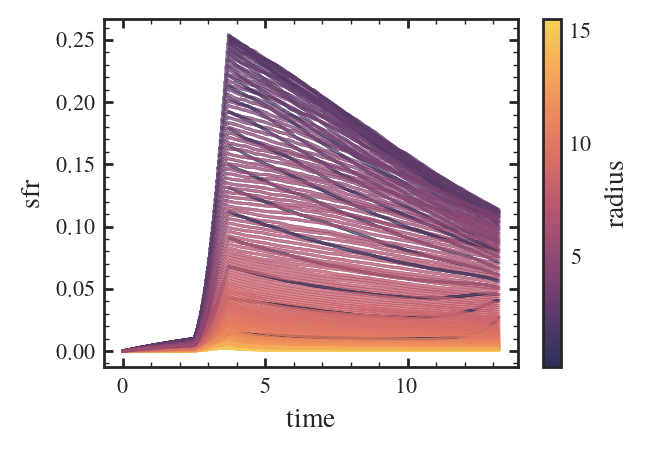

In [38]:
plt.scatter(h.time, h.sfr, c=h.R, s=0.01)
plt.xlabel("time")
plt.ylabel("sfr")
plt.colorbar(label="radius")

(-4.0, -0.5)

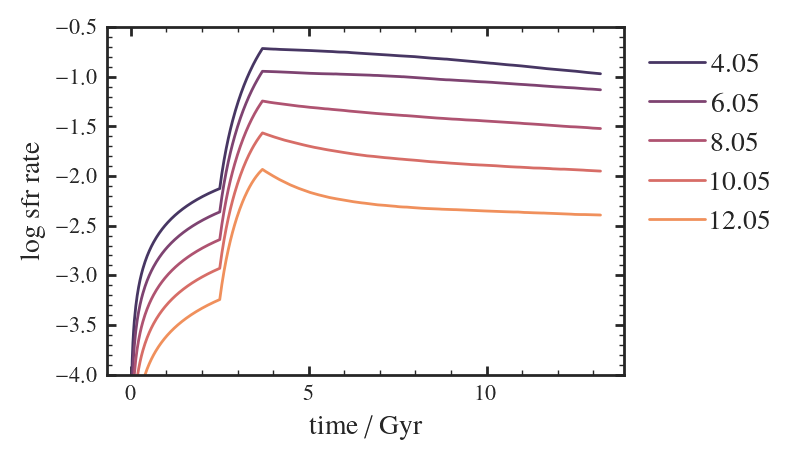

In [67]:
Rs = 0.05 + np.arange(4, 13, 2)

hm = arya.HueMap((3, 15))
for R in Rs:
    tau_rise = 2
    filt = np.isclose(h.R, R)
    h1 = h[filt]
    plt.plot(h1.time, np.log10(h1.sfr ), color=hm(R), label=R)
    
plt.xlabel("time / Gyr")
plt.ylabel("log sfr rate")
arya.Legend(-1)
plt.ylim(-4, -0.5)

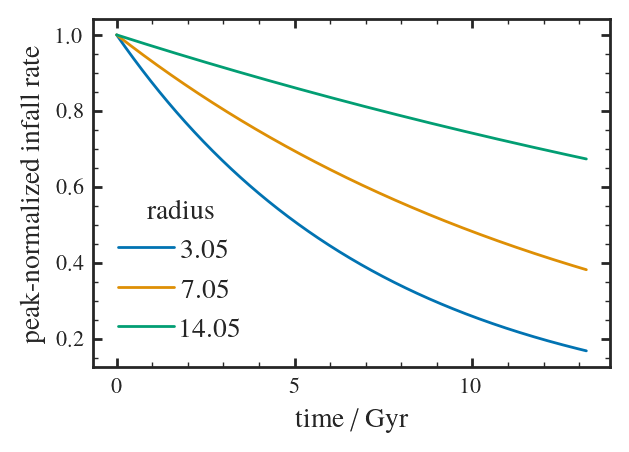

In [40]:
for R, tau_sfh in [(3.05, 7.5), (7.05, 14), (14.05, 35)]:
    tau_rise = 2
    filt = np.isclose(h.R, R)
    h1 = h[filt]
    plt.plot(h1.time, h1.ifr / np.max(h1.ifr), label=R)
plt.xlabel("time / Gyr")
plt.ylabel("peak-normalized infall rate")
plt.legend(title="radius")

Text(0.5, 0, 'radius / kpc')

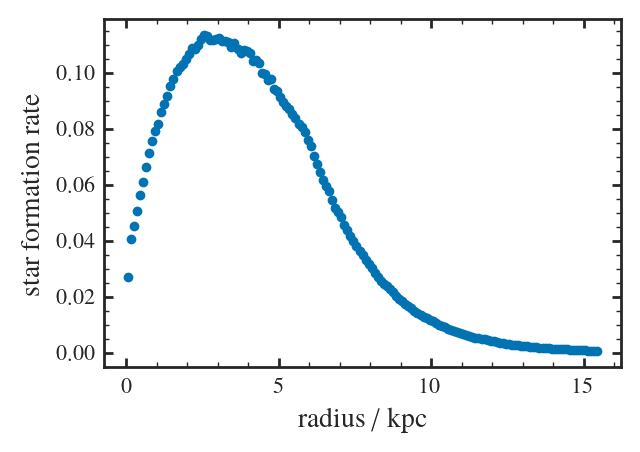

In [41]:
plt.scatter(h_end.R, h_end.sfr)
plt.ylabel("star formation rate ")
plt.xlabel("radius / kpc")

In [42]:
dR = h_end.R[1] - h_end.R[0]

/tmp/ipykernel_2581426/243264679.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  dR = h_end.R[1] - h_end.R[0]


/tmp/ipykernel_2581426/2648931104.py:5: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.yscale("log")


Text(0.5, 0, 'R')

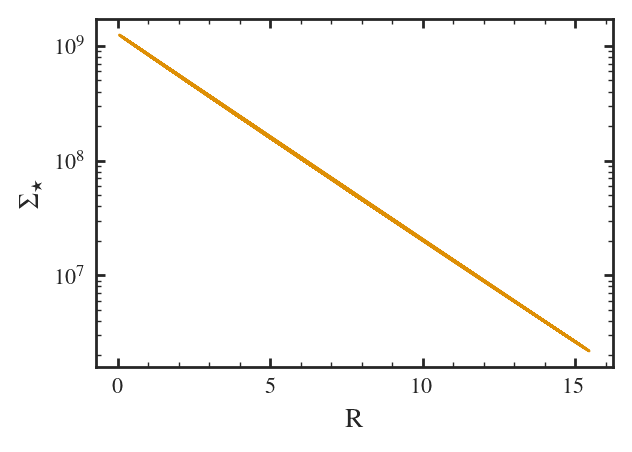

In [43]:
A = (2*np.pi * h_end.R * dR).values
plt.plot(h_end.R, h_end.mstar / A)
#plt.plot(h_end.R, h_end.mgas / A)

plt.yscale("log")
#plt.xscale("log")
plt.plot(h_end.R, 1e9*(np.exp(-h_end.R / 2.5) + 0.27*np.exp(-h_end.R / 2.0)))
plt.ylabel(r"$\Sigma_\star$")
plt.xlabel("R")


star formation densities are okay. divergence at centre is likely a result of migration but may not even be that unphysical.

# SFR Law

In [45]:
Σgas = h_end.mgas/A

1/(h_end.sfr / A / Σgas * 1e9)[np.isclose(h_end.R, 7.05)]

25778    2.36
dtype: float64

Text(0.5, 1.0, 'z = 0')

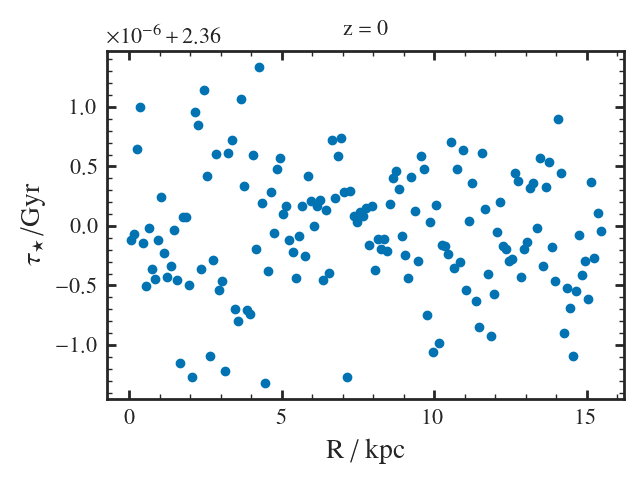

In [46]:
Σgas = h_end.mgas/A
yr_per_Gyr = 1e9
tau_star = h_end.mgas /(h_end.sfr * yr_per_Gyr)
plt.scatter(h_end.R, tau_star)

plt.xlabel(r"R / kpc")
plt.ylabel(r"$\tau_\star\,$/Gyr")
plt.title("z = 0")


In [47]:
h_solar = h[h.R == 8.05]

Text(0, 0.5, 'tau star / Gyr')

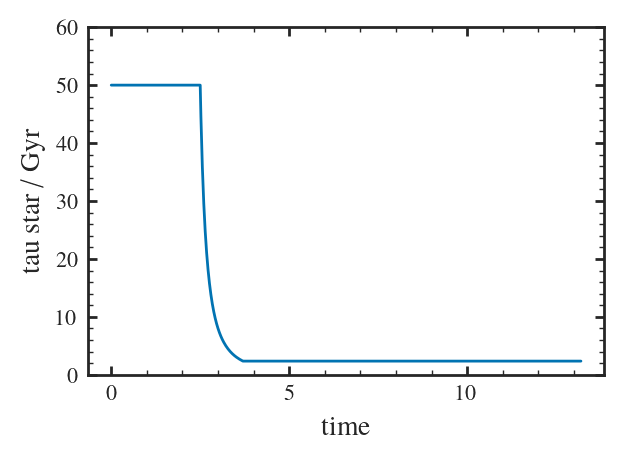

In [49]:
tau_star = h_solar.mgas /(h_solar.sfr * yr_per_Gyr)

plt.plot(h_solar.time, tau_star)
plt.ylim(0, 60)
plt.xlabel("time")
plt.ylabel("tau star / Gyr")

# Outflows and yields

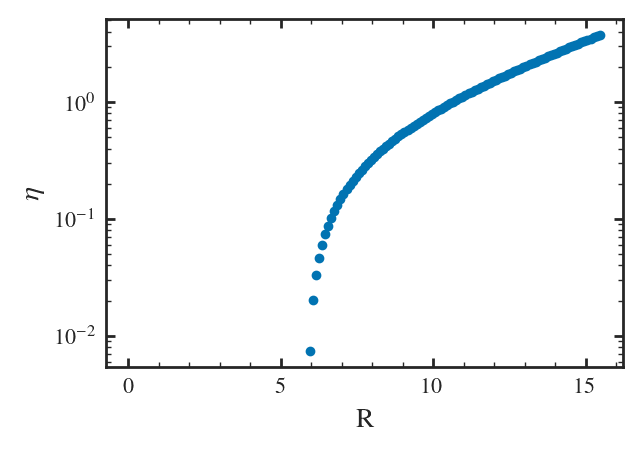

In [50]:
plt.scatter(h_end.R, h_end.eta_0)
plt.xlabel("R")
plt.ylabel(r"$\eta$")
plt.yscale("log")

In [51]:
from surp.simulation.properties import MH_grad

Text(0, 0.5, '[M/H]')

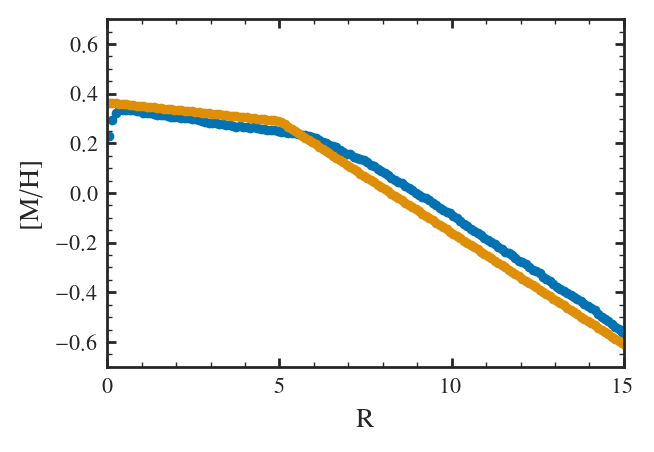

In [53]:
plt.scatter(h_end.R, h_end.M_H)
y = MH_grad(params)(h_end.R)
plt.scatter(h_end.R, y)

plt.xlim(0, 15)
plt.ylim(-0.7, 0.7)
plt.xlabel("R")
plt.ylabel(r"[M/H]")

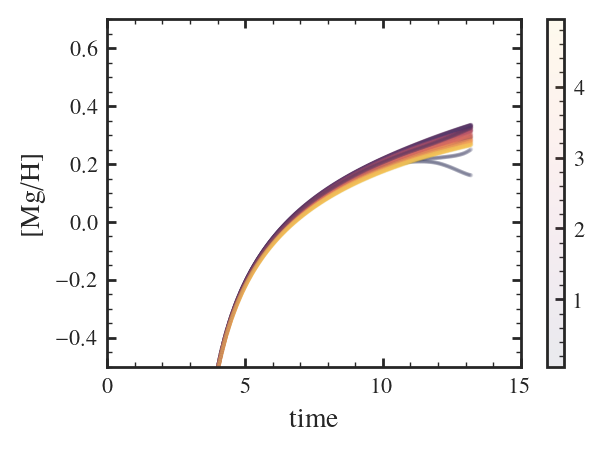

In [54]:
filt = h.R < 5
df = h[filt]
plt.scatter(df.time, df.MG_H, s=0.3, alpha=0.1, c=df.R)
plt.xlim(0, 15)
plt.ylim(-0.5, 0.7)
plt.xlabel("time")
plt.ylabel("[Mg/H]")
plt.colorbar()

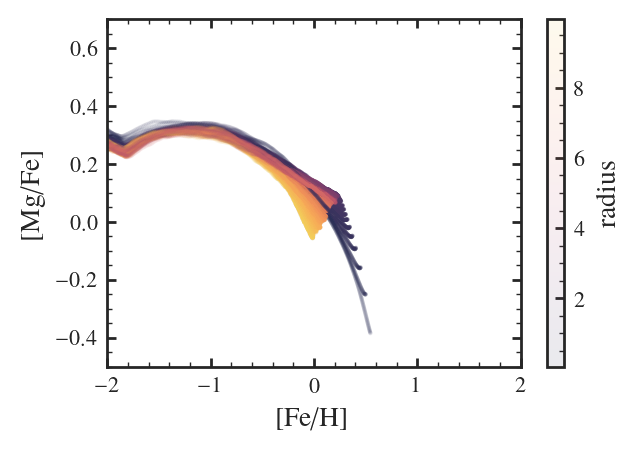

In [55]:
filt = h.R < 10
df = h[filt]
plt.scatter(df.FE_H, df.MG_FE, s=0.3, alpha=0.1, c=df.R)
plt.xlim(-2, 2)
plt.ylim(-0.5, 0.7)
plt.xlabel("[Fe/H]")
plt.ylabel("[Mg/Fe]")
plt.colorbar(label="radius")